In [17]:
### IMPORT ###

import numpy as np
import matplotlib.pyplot as plt
import cv2

In [18]:
### READ THE IMAGES ###
pic=cv2.imread('batman.PNG')
watermark=cv2.imread('abrar.PNG')

### Convert the images to RGB format ###
pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
watermark=cv2.cvtColor(watermark,cv2.COLOR_BGR2RGB)

### Resize ###
watermark=cv2.resize(watermark,(600,600))



 Shape of the pic:: (1280, 757, 3)


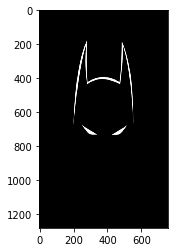

In [24]:
print(" Shape of the pic::",pic.shape)
plt.imshow(pic)

Shape of the watermark::  (600, 600, 3)


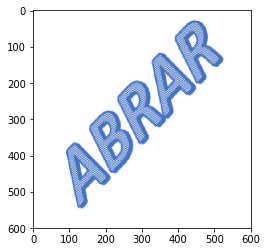

In [25]:
print("Shape of the watermark:: ",watermark.shape)
plt.imshow(watermark)

Shape of the selected region::  (600, 600, 3)


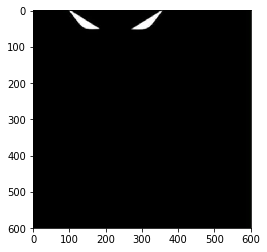

In [28]:
### Selecting a region from the pic to place the watermark ###
# bottom right corner #

x_off=757-600
y_off=1280-600

rows,columns,channels=watermark.shape
pos=pic[y_off:1280,x_off:757]
plt.imshow(pos)
print("Shape of the selected region:: ",pos.shape)

In [29]:
###  Creating a mask ###
watermarkgray=cv2.cvtColor(watermark,cv2.COLOR_RGB2GRAY)

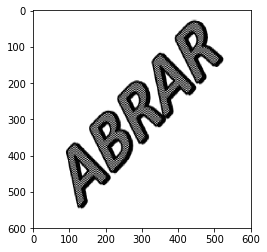

In [30]:
plt.imshow(watermarkgray,cmap='gray')

In [31]:
### Inverting the mask ###

mask_inv=cv2.bitwise_not(watermarkgray)

(600, 600)


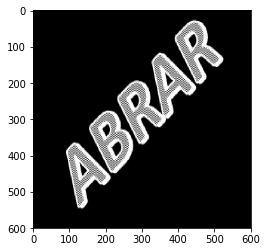

In [32]:
plt.imshow(mask_inv,cmap='gray')
print(mask_inv.shape)

In [36]:
### Change the size from 2d to 3d ###

white_bg=np.full(watermark.shape,255,dtype=np.uint8)
print("White Background Shape:: ",white_bg.shape)

White Background Shape::  (600, 600, 3)


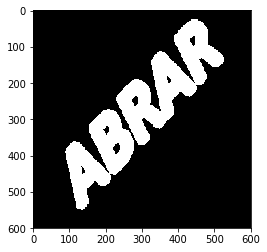

In [38]:
###  White out the required text ###
bk=cv2.bitwise_or(white_bg,white_bg,mask=mask_inv)
plt.imshow(bk)

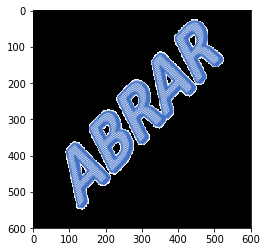

In [39]:
### Regaining the original color of the watermark ###

fg=cv2.bitwise_or(watermark,watermark,mask=mask_inv)
plt.imshow(fg)

In [40]:
###  placing it over the selected region as taken above ###

pos_final=cv2.bitwise_or(pos,fg)

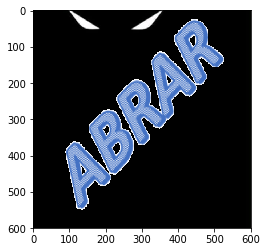

In [41]:
plt.imshow(pos_final)

In [42]:
### The final image ###

large=pic
small=pos_final

large[y_off:y_off+small.shape[0],x_off:x_off+small.shape[1]]=small

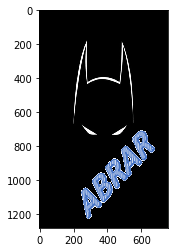

In [43]:
plt.imshow(large)